# Arpitha Coorg


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(42)


In [36]:
# 1c)

N = 1000
X = np.random.uniform(-2,2,size=(N,1))
epsilon = np.random.normal(0, np.sqrt(2), size = (N,1))
Y = 1+2*X + epsilon

lin_reg = LinearRegression()
lin_reg.fit(X,Y)
slope_lin_reg = lin_reg.coef_[0]
y_pred_lin_reg = lin_reg.predict(X)
mse_lin_reg = np.mean((Y - y_pred_lin_reg) ** 2)
r2_lin_reg = 1 - np.sum((Y - y_pred_lin_reg) ** 2) / np.sum((Y - Y.mean()) ** 2)

lambdas = [1,10,100,1000,10000]

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X,Y)
    Y_pred_ridge = ridge.predict(X)

    print(f"Ridge Regression (λ = {lam})")
    print("Slope:", ridge.coef_[0])
    print("MSE:", mean_squared_error(Y, Y_pred_ridge))
    print("R2:", r2_score(Y, Y_pred_ridge))
    print()

Ridge Regression (λ = 1)
Slope: [1.94385022]
MSE: 1.9499385334705763
R2: 0.7258234161762789

Ridge Regression (λ = 10)
Slope: [1.93111889]
MSE: 1.9502091382774902
R2: 0.7257853670274199

Ridge Regression (λ = 100)
Slope: [1.81241411]
MSE: 1.974015691927705
R2: 0.7224379796916691

Ridge Regression (λ = 1000)
Slope: [1.12245027]
MSE: 2.8735158068753828
R2: 0.5959612398190273

Ridge Regression (λ = 10000)
Slope: [0.23350923]
MSE: 5.947067317370993
R2: 0.1637958977381866



#### 1a. 
As the regularization parameter increase, the behavior of the ridge regression model changes. For the smaller values like 1 and 10, the slope is close to the unregularized solution, and the model has a low MSE and high R^2 values, showing a strong predictive performance. As the value increases to 100 the coeffiencent starts to shrink, the MSE increases, and the R^2 decreases. For the very large values like 1000 and 100000, the coeffient gets closer to 0, resulting in an increase in MSE and a decline in R^2. This shows a transition from a well-fitted model to an underfitted one, where the model is overlt constrained and unable to show the relationship in the data. Overall, these results show the eddect of ridge regulatization in controlling model complexity and highlight the bias-variance tradeoff, where increase the value reduces variance, but increases bias and decreases performance. 

In [37]:
# 2a)
df = pd.read_csv('flights.csv')
Y = df["ARRIVAL_DELAY"]
X = df.drop(columns=["ARRIVAL_DELAY"])

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size= 0.25,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    max_iter = 1000,
    random_state = 42
)
log_reg.fit(X_train_scaled, Y_train)

Y_pred = log_reg.predict(X_test_scaled)

cm = confusion_matrix(Y_test, Y_pred)
print("1.")
print("Confusion Matrix:")
print(cm)

tn, fp, fn, tp = cm.ravel()
print("2.")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

accuracy = accuracy_score(Y_test,Y_pred)
error = 1 - accuracy
print("3.")
print("Accuracy:", accuracy)
print("Error:", error)

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("4.")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1.
Confusion Matrix:
[[707 544]
 [505 744]]
2.
True Positives (TP): 744
True Negatives (TN): 707
False Positives (FP): 544
False Negatives (FN): 505
3.
Accuracy: 0.5804
Error: 0.4196
4.
Precision: 0.577639751552795
Recall: 0.5956765412329864
F1 Score: 0.5865195112337407


In [38]:
# 2b)
feature_names = X.columns
coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df_sorted = coef_df.sort_values('Coefficient', ascending=False)
                              
most_contributed = coef_df.loc[coef_df["Coefficient"].abs().idxmax()]

print("Most contributions:")
print("-" * 40)
print(f"Feature     : {most_contributed['Feature']}")
print(f"Coefficient : {most_contributed['Coefficient']:.6f}")

print("\nTop 3 Positively Correlated Features")
print("-" * 40)
print(f"{'Feature':<30} {'Coefficient':>12}")
print("-" * 40)
for _, row in coef_df_sorted.head(3).iterrows():
    print(f"{row['Feature']:<30} {row['Coefficient']:>12.6f}")


print("\nTop 3 Negatively Correlated Features")
print("-" * 40)
print(f"{'Feature':<30} {'Coefficient':>12}")
print("-" * 40)

for _, row in coef_df_sorted.tail(3).sort_values("Coefficient").iterrows():
    print(f"{row['Feature']:<30} {row['Coefficient']:>12.6f}")


Most contributions:
----------------------------------------
Feature     : SCHEDULED_DEPARTURE
Coefficient : 0.437035

Top 3 Positively Correlated Features
----------------------------------------
Feature                         Coefficient
----------------------------------------
SCHEDULED_DEPARTURE                0.437035
DESTINATION_AIRPORT_WRG            0.197158
ORIGIN_AIRPORT_CWA                 0.152991

Top 3 Negatively Correlated Features
----------------------------------------
Feature                         Coefficient
----------------------------------------
DESTINATION_AIRPORT_ABI           -0.225254
ORIGIN_AIRPORT_FSM                -0.171173
DESTINATION_AIRPORT_LRD           -0.158592


In [39]:
# 2c)

y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

thresholds = [0.25, 0.5, 0.75, 0.9]
print("Threshold | Accuracy | Precision | Recall")
print("-------------------------------------------")
for T in thresholds:
    y_pred_T = (y_prob >= T).astype(int)
    acc_t = accuracy_score(Y_test, y_pred_T)
    prec_t = precision_score(Y_test, y_pred_T)
    rec_t = recall_score(Y_test,y_pred_T)

    print(f"{T:8} | {acc_t:.4f}   | {prec_t:.4f}    | {rec_t:.4f}")

Threshold | Accuracy | Precision | Recall
-------------------------------------------
    0.25 | 0.5280   | 0.5149    | 0.9552
     0.5 | 0.5804   | 0.5776    | 0.5957
    0.75 | 0.5152   | 0.5969    | 0.0913
     0.9 | 0.5052   | 0.6500    | 0.0208


#### 2c.
When the threshold is low like 0.25, the model predicts a lot of flight delays which causes a very high recall but lower precision and accuracy because it also makes many false positives. At the standard threshold, 0.5, the model finds a better balance, with a good accuracy, precision, and recall. As the threshold increases to 0.75 and 0.9, the model because more cautious and predicting delays. Precision improves, but the recall drops, showing there are many actual delays are missed. Overall the lower thresholds catch more delays, but the higher threshold are more confident in predictions. 

In [40]:
# 3
def sigmoid(Z):
    return 1/ (1 + np.exp(-Z))

def cross_entropy_loss(X,Y,theta):
    N = len(Y)
    Z = X @ theta
    P = sigmoid(Z)
    eps = 1e-15
    loss = - (1/N) * np.sum(
        Y * np.log(P + eps) + (1 - Y) * np.log(1 - P + eps)
    )
    return loss

def gradient_descent_logistic(X,Y,learning_rate = 0.01, iterations = 100):
    N,D = X.shape
    theta = np.zeros(D)
    losses = []

    for i in range (iterations):
        H = sigmoid(X @ theta)
        gradient = (1/N) * X.T @ (H-Y)
        theta = theta - learning_rate * gradient
        loss = cross_entropy_loss(X,Y,theta)
        losses.append(loss)
    return theta, losses


X_train_int = np.column_stack([np.ones(len(X_train_scaled)),X_train_scaled])
X_test_int = np.column_stack([np.ones(len(X_test_scaled)), X_test_scaled])

learning_rates = [0.1,0.01,0.001]
gd_results = {}

for lr in learning_rates:
    theta, losses = gradient_descent_logistic(
        X_train_int,
        Y_train.values,
        lr, 
        iterations = 100
    )
    gd_results[lr] = {"theta": theta, "losses": losses}


print("Cross Entropy Loss")
print("-" * 60)
print(f"{'LR':<10} {'Iter 10':<15} {'Iter 50':<15} {'Iter 100':<15}")

for lr in learning_rates:
    losses = gd_results[lr]["losses"]
    print(
        f"{lr:<10}"
        f"{losses[9]:<15.6f}"
        f"{losses[49]:<15.6f}"
        f"{losses[99]:<15.6f}"
    )

print("Performance at 100 iterations")
print("-" * 80)
print(f"{'LR':<8} {'Set':<8} {'Acc':<10} {'Prec':<10} {'Recall':<10} {'F1':<10}")

for lr in learning_rates:
    theta = gd_results[lr]["theta"]
    
    for name, X_split, Y_split in [
        ("Train", X_train_int, Y_train),
        ("Test", X_test_int, Y_test),
    ]:
        probs = sigmoid(X_split @ theta)
        preds = (probs >= 0.5).astype(int)

        print(
            f"{lr:<8} {name:<8} "
            f"{accuracy_score(Y_split, preds):<10.4f} "
            f"{precision_score(Y_split, preds, zero_division=0):<10.4f} "
            f"{recall_score(Y_split, preds, zero_division=0):<10.4f} "
            f"{f1_score(Y_split, preds, zero_division=0):<10.4f}"
        )

log_reg_pkg = LogisticRegression(max_iter = 1000, random_state=42)
log_reg_pkg.fit(X_train_scaled, Y_train)

print("Sklearn Logistic Regression Performance")
print("-" * 60)

for name, X_split, Y_split in [
    ("Train", X_train_scaled, Y_train),
    ("Test", X_test_scaled, Y_test),
]:
    preds = log_reg_pkg.predict(X_split)
    print(f"{name} Set:")
    print("Accuracy:", accuracy_score(Y_split, preds))
    print("Precision:", precision_score(Y_split, preds))
    print("Recall:", recall_score(Y_split, preds))
    print("F1:", f1_score(Y_split, preds))
    print()


Cross Entropy Loss
------------------------------------------------------------
LR         Iter 10         Iter 50         Iter 100       
0.1       0.664445       0.629711       0.621944       
0.01      0.689422       0.676722       0.664727       
0.001     0.692764       0.691256       0.689427       
Performance at 100 iterations
--------------------------------------------------------------------------------
LR       Set      Acc        Prec       Recall     F1        
0.1      Train    0.6431     0.6399     0.6425     0.6412    
0.1      Test     0.5776     0.5753     0.5901     0.5826    
0.01     Train    0.6353     0.6303     0.6417     0.6360    
0.01     Test     0.5712     0.5673     0.5973     0.5819    
0.001    Train    0.6320     0.6270     0.6385     0.6327    
0.001    Test     0.5712     0.5672     0.5981     0.5822    
Sklearn Logistic Regression Performance
------------------------------------------------------------
Train Set:
Accuracy: 0.648
Precision: 0.6441309

#### 3.
I used the learning rates 0.1, 0.001, and 0.0001, and the cross-entropy loss decreases with mroe iterations for all cases showing that the gradient descent converges. The learning rate 0.1 converges fastes and has the lowest loss by 100 iterations, and the smaller learning rates converge slower. At 100 iterations, the model with learning rate 0.1 also achieves the best accuracy, precision, recall, and F1 score. Compared to the scikit-learn's logistic regression, the gradient descent implementation performs similarly but slightly worse. 

In [41]:
# 4a)
X_train_cv = X_train_scaled
Y_train_cv = Y_train.values

k_values = [3,5,7,21]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for k in k_values:
    fold_metrics = {'accuracy': [], 'error': [], 'precision': [], 'recall': [], 'f1': []}

    for train_idx, val_idx in kf.split(X_train_cv):
        X_tr, X_val = X_train_cv[train_idx], X_train_cv[val_idx]
        Y_tr, Y_val = Y_train_cv[train_idx], Y_train_cv[val_idx]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, Y_tr)
        Y_pred = knn.predict(X_val)
        acc = accuracy_score(Y_val, Y_pred)

        fold_metrics['accuracy'].append(accuracy_score(Y_val, Y_pred))
        fold_metrics['error'].append(1 - accuracy_score(Y_val, Y_pred))
        fold_metrics['precision'].append(precision_score(Y_val, Y_pred))
        fold_metrics['recall'].append(recall_score(Y_val,Y_pred))
        fold_metrics['f1'].append(f1_score(Y_val, Y_pred))
    avg_metrics = {M: np.mean(V) for M, V in fold_metrics.items()}

    print(f"\nk = {k}")
    print(f" Average Accuracy: {avg_metrics['accuracy']:.4f}")
    print(f" Average Error: {avg_metrics['error']:.4f}")
    print(f" Average Precision: {avg_metrics['precision']:.4f}")
    print(f" Average Recall: {avg_metrics['recall']:.4f}")
    print(f" Average F1 Score: {avg_metrics['f1']:.4f}")

    cv_results.append({
        "k":k,
        **avg_metrics
    })
best_k = min(cv_results, key=lambda x: x["error"])["k"]
print(f"Best k (minimum average CV error): {best_k}")




k = 3
 Average Accuracy: 0.5141
 Average Error: 0.4859
 Average Precision: 0.5106
 Average Recall: 0.5247
 Average F1 Score: 0.5173

k = 5
 Average Accuracy: 0.5245
 Average Error: 0.4755
 Average Precision: 0.5206
 Average Recall: 0.5379
 Average F1 Score: 0.5289

k = 7
 Average Accuracy: 0.5240
 Average Error: 0.4760
 Average Precision: 0.5201
 Average Recall: 0.5398
 Average F1 Score: 0.5294

k = 21
 Average Accuracy: 0.5333
 Average Error: 0.4667
 Average Precision: 0.5287
 Average Recall: 0.5569
 Average F1 Score: 0.5422
Best k (minimum average CV error): 21


In [42]:
# 4b)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
log_reg_4b = LogisticRegression(max_iter=1000, random_state=42)
lda = LinearDiscriminantAnalysis()

classifiers = {
    f'kNN (k = {best_k})' : knn_best,
    'Logistic Regression': log_reg_4b,
    'LDA' : lda
}
results_4b = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, Y_train)
    Y_train_pred = clf.predict(X_train_scaled)
    train_metrics ={
        'accuracy': accuracy_score(Y_train, Y_train_pred),
        'error': 1 - accuracy_score(Y_train, Y_train_pred),
        'precision': precision_score(Y_train, Y_train_pred),
        'recall': recall_score(Y_train, Y_train_pred),
        'f1': f1_score(Y_train, Y_train_pred)
    }
    Y_test_pred = clf.predict(X_test_scaled)
    test_metrics = {
        'accuracy': accuracy_score(Y_test, Y_test_pred),
        'error': 1 - accuracy_score(Y_test, Y_test_pred),
        'precision': precision_score(Y_test, Y_test_pred),
        'recall': recall_score(Y_test, Y_test_pred),
        'f1': f1_score(Y_test, Y_test_pred)
    }

    results_4b[name] = {'train': train_metrics, 'test': test_metrics}

    print(f"\n{name}:")
    print(f" Training Set:")
    print(f" Accuracy: {train_metrics['accuracy']:.4f}")
    print(f" Error: {train_metrics['error']:.4f}")
    print(f" Precision: {train_metrics['precision']:.4f}")
    print(f" Recall: {train_metrics['recall']:.4f} ")
    print(f" F1 Score: {train_metrics['f1']:.4f}")
    print(f" Tesing Set:")
    print(f" Accuracy: {test_metrics['accuracy']:.4f}")
    print(f" Error: {test_metrics['error']:.4f}")
    print(f" Precision: {test_metrics['precision']:.4f}")
    print(f" Recall: {test_metrics['recall']:.4f} ")
    print(f" F1 Score: {test_metrics['f1']:.4f}")


kNN (k = 21):
 Training Set:
 Accuracy: 0.6100
 Error: 0.3900
 Precision: 0.6028
 Recall: 0.6283 
 F1 Score: 0.6153
 Tesing Set:
 Accuracy: 0.5188
 Error: 0.4812
 Precision: 0.5176
 Recall: 0.5404 
 F1 Score: 0.5288

Logistic Regression:
 Training Set:
 Accuracy: 0.6480
 Error: 0.3520
 Precision: 0.6441
 Recall: 0.6500 
 F1 Score: 0.6471
 Tesing Set:
 Accuracy: 0.5804
 Error: 0.4196
 Precision: 0.5776
 Recall: 0.5957 
 F1 Score: 0.5865

LDA:
 Training Set:
 Accuracy: 0.6495
 Error: 0.3505
 Precision: 0.6454
 Recall: 0.6522 
 F1 Score: 0.6488
 Tesing Set:
 Accuracy: 0.5792
 Error: 0.4208
 Precision: 0.5758
 Recall: 0.5989 
 F1 Score: 0.5871


#### 4b.
Out of all the metrics, Logistic Regression and LDA outperform kNN on both training and testing sets. The kNN model shows a decrease in performance on the test set, with lower accuracy and F1 score, showing a weaker generalization. Between Logistic Regression and LDA, performance is very similar. LDA slightly outperforms Logistic Regression in recall and F1 score on the test set, while LR has a much higher test accuracy. Overall, LDA performs the best, then Logistic Regression, while kNN performs the worst

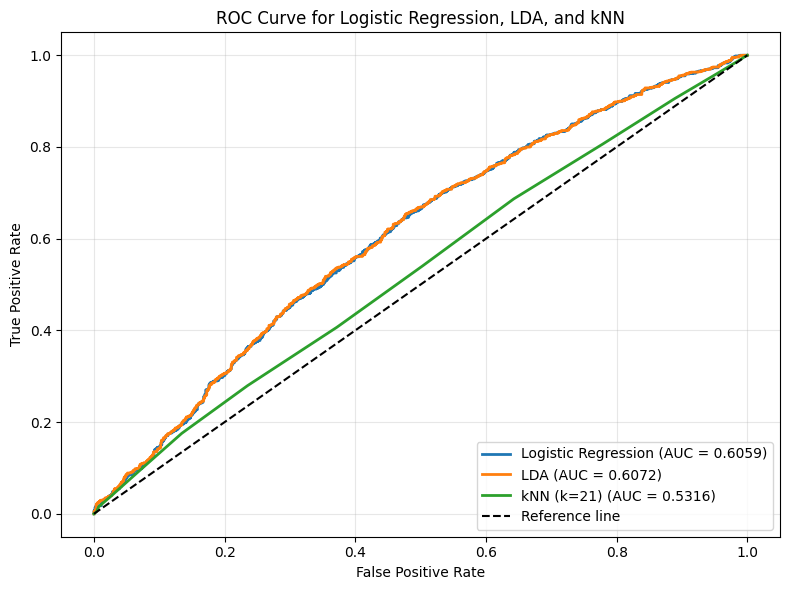


Logistic Regression AUC: 0.6059
LDA AUC:                0.6072
kNN (k=21) AUC:   0.5316


In [43]:
# 4c)
plt.figure(figsize = (8,6))

Y_prob_log = log_reg_4b.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(Y_test, Y_prob_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(
    fpr_log, tpr_log,
    label = f"Logistic Regression (AUC = {auc_log:.4f})",
    linewidth = 2
)

Y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(Y_test, Y_prob_lda)
auc_lda = auc(fpr_lda, tpr_lda)
plt.plot(
    fpr_lda, tpr_lda,
    label = f"LDA (AUC = {auc_lda:.4f})",
    linewidth = 2
)

Y_prob_knn = knn_best.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(
    fpr_knn, tpr_knn,
    label = f"kNN (k={best_k}) (AUC = {auc_knn:.4f})",
    linewidth = 2
)

plt.plot([0,1],[0,1], 'k--', label = 'Reference line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression, LDA, and kNN')
plt.legend(loc = 'lower right')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

print(f"\nLogistic Regression AUC: {auc_log:.4f}")
print(f"LDA AUC:                {auc_lda:.4f}")
print(f"kNN (k={best_k}) AUC:   {auc_knn:.4f}")

Manual ROC Calculation:
------------------------------------------------------------
Threshold    FPR          TPR         
------------------------------------------------------------
0.00         1.0000       1.0000      
0.10         0.9728       0.9872      
0.20         0.9440       0.9704      
0.30         0.8369       0.9175      
0.40         0.6427       0.7862      
0.50         0.4349       0.5957      
0.60         0.2470       0.3739      
0.70         0.1079       0.1625      
0.80         0.0288       0.0488      
0.90         0.0112       0.0208      
1.00         0.0000       0.0000      


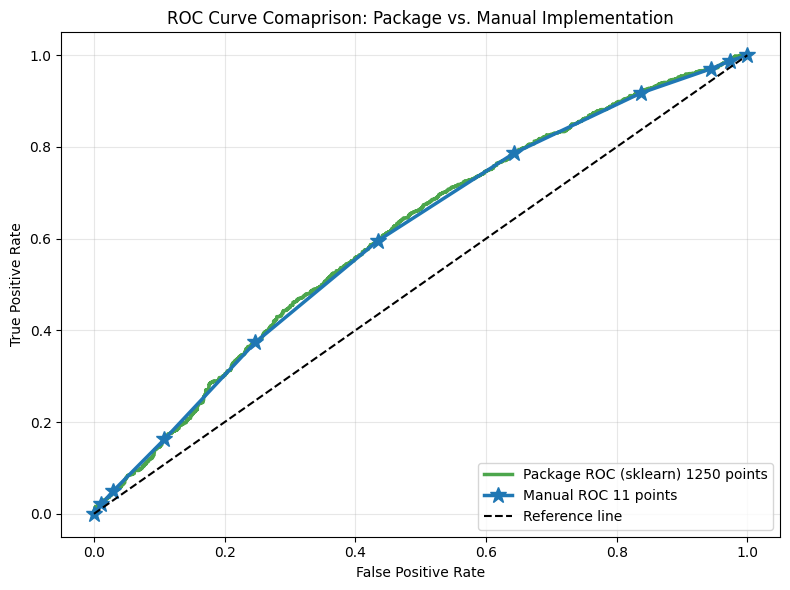

In [44]:
# 4d)
thresholds_manual = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
fpr_manual = []
tpr_manual = []

print("Manual ROC Calculation:")
print("-" * 60)
print(f"{'Threshold': <12} {'FPR':<12} {'TPR':<12}")
print("-" * 60)

for threshold in thresholds_manual:
    Y_pred_threshold = (Y_prob_log >= threshold).astype(int)

    tn = np.sum((Y_test == 0) & (Y_pred_threshold == 0))
    fp = np.sum((Y_test == 0) & (Y_pred_threshold == 1))
    fn = np.sum((Y_test == 1) & (Y_pred_threshold == 0))
    tp = np.sum((Y_test == 1) & (Y_pred_threshold == 1))
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr_manual.append(tpr)
    fpr_manual.append(fpr)

    print(f"{threshold:<12.2f} {fpr:<12.4f} {tpr:<12.4f}")

plt.figure(figsize=(8,6))
plt.plot(
    fpr_log,tpr_log,
    label = f'Package ROC (sklearn) {len(fpr_log)} points',
    linewidth = 2.5,
    color = 'green',
    alpha = 0.7
)
plt.plot(
    fpr_manual, tpr_manual,
    label = f'Manual ROC {len(fpr_manual)} points',
    marker = '*',
    markersize = 12,
    linewidth = 2.5
)
plt.plot([0,1],[0,1],'k--', label = 'Reference line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comaprison: Package vs. Manual Implementation')
plt.legend(loc = 'lower right')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

#### 4d.
The manual ROC curve is less smooth than the package ROC because it is computed using only small, fixed set of thresholds, whereas the package evaluates a lot more thresholds based on the predicted probabilites. in order to make the two more similar, we can increase the number of thresholds used in the manual computation, or use all unique prediction scores as thresholds. This would produce a smoother curve. 

In [45]:
# 5a)
def k_fold_cross_validation(X,Y, model_class, model_kwargs = None, k = 5):
    if model_kwargs is None:
        model_kwargs = {}


    N_samples = len(X)
    fold_size = N_samples // k
    indices = np.arange(N_samples)
    np.random.seed(42)
    np.random.shuffle(indices)
    errors = []

    print(f"{k}Fold Cross-Validation for {model_class.__name__}:")
    print("-" * 60) 
    
    for i in range(k):
        val_start = i * fold_size
        val_end = (i+1) * fold_size if i < k - 1 else N_samples
        val_idx = indices[val_start:val_end]
        train_idx = np.concatenate([indices[:val_start], indices[val_end:]])

        X_train, X_val = X[train_idx], X[val_idx]
        Y_train = Y[train_idx] if isinstance(Y, np.ndarray) else Y.iloc[train_idx]
        Y_val = Y[val_idx] if isinstance(Y, np.ndarray) else Y.iloc[val_idx]

        scaler= StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        model = model_class(**model_kwargs)
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_val_scaled)
        error = 1 - accuracy_score(Y_val, Y_pred)
        errors.append(error)

        print(f" Fold {i+1}/{k}: Validation Error = {error:.4f}")

    avg_error = np.mean(errors)
    std_error = np.std(errors)
    print(f"Average Validation Error: {avg_error:.4f}")
    print(f" Std Dev of Errors: {std_error:.4f}")
    return avg_error, errors



In [46]:
# 5b)
X_np = X.values
Y_np = Y.values
results_5b = {}

for K in [5,10]:
    print("\n" + "=" * 70)
    print(f"Cross validation with K = {K}")
    print("="*70)
    
    print("\nLogistic Regression")
    avg_err_log, _ = k_fold_cross_validation(
        X_np,
        Y_np,
        LogisticRegression,
        {"max_iter": 1000, "random_state": 42},
        k=K
    )
    print("\nLDA:")
    avg_err_lda, _ = k_fold_cross_validation(
        X_np,
        Y_np,
        LinearDiscriminantAnalysis,
        {},
        k=K
    )

    results_5b[K] = {
        "Logistic Regression": avg_err_log,
        "LDA": avg_err_lda
    }


Cross validation with K = 5

Logistic Regression
5Fold Cross-Validation for LogisticRegression:
------------------------------------------------------------
 Fold 1/5: Validation Error = 0.4120
 Fold 2/5: Validation Error = 0.4045
 Fold 3/5: Validation Error = 0.4040
 Fold 4/5: Validation Error = 0.4055
 Fold 5/5: Validation Error = 0.4210
Average Validation Error: 0.4094
 Std Dev of Errors: 0.0065

LDA:
5Fold Cross-Validation for LinearDiscriminantAnalysis:
------------------------------------------------------------
 Fold 1/5: Validation Error = 0.4140
 Fold 2/5: Validation Error = 0.4045
 Fold 3/5: Validation Error = 0.4095
 Fold 4/5: Validation Error = 0.4075
 Fold 5/5: Validation Error = 0.4215
Average Validation Error: 0.4114
 Std Dev of Errors: 0.0059

Cross validation with K = 10

Logistic Regression
10Fold Cross-Validation for LogisticRegression:
------------------------------------------------------------
 Fold 1/10: Validation Error = 0.4170
 Fold 2/10: Validation Error = 0

#### 5c.
Both models have very similar performance under cross validation. For K=5, Logistic Regression performs a little better, however for K=10, LDA has a lower validation error. This suggests that enigther model clearly outperfoms the other. Overall, both models generlize simiarly well to unseen data, and either choice would be good.